## Training neural network on custom dataset

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6997 - loss: 0.6556 - val_accuracy: 0.7692 - val_loss: 0.5944
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8257 - loss: 0.5511 - val_accuracy: 0.7552 - val_loss: 0.5364
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4967 - val_accuracy: 0.7692 - val_loss: 0.5029
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4512 - val_accuracy: 0.7692 - val_loss: 0.4891
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8135 - loss: 0.4271 - val_accuracy: 0.7692 - val_loss: 0.4794
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.4105 - val_accuracy: 0.7832 - val_loss: 0.4683
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8003 - loss: 0.4257 - val_accuracy: 0.7832 - val_loss: 0.4723
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8268 - loss: 0.3887 - val_accuracy: 0.7832 - val_loss: 0.47

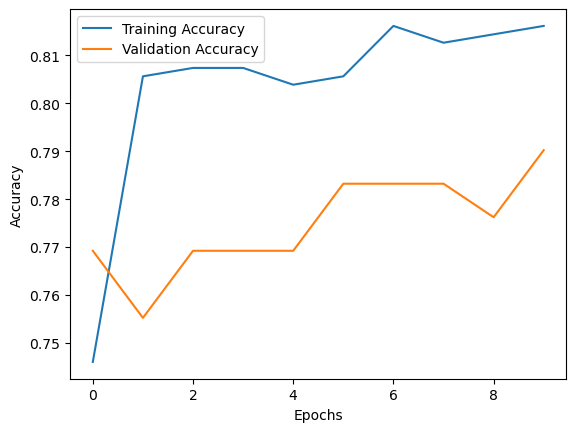

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Passenger 1: Predicted Survival = 0, Actual = 0
Passenger 2: Predicted Survival = 1, Actual = 1
Passenger 3: Predicted Survival = 1, Actual = 1
Passenger 4: Predicted Survival = 1, Actual = 1
Passenger 5: Predicted Survival = 0, Actual = 0
Passenger 6: Predicted Survival = 1, Actual = 1
Passenger 7: Predicted Survival = 0, Actual = 1
Passenger 8: Predicted Survival = 0, Actual = 1
Passenger 9: Predicted Survival = 1, Actual = 0
Passenger 10: Predicted Survival = 1, Actual = 0


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# preprocess data
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
df = df[features + ["Survived"]].dropna()
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
X = df[features].values
y = df["Survived"].values
X = StandardScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# plotting training accuracy vs. epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = (model.predict(x_test[:10]) > 0.5).astype(int).flatten()

# visualize predictions
for i in range(10):
    print(f'Passenger {i+1}: Predicted Survival = {predictions[i]}, Actual = {y_test[i]}')